#  Black Friday Customer Analysis 

## Analysis Provided by Sophia Rowland 
## October 2018
<hr>

<br><hr id="toc">
## Table of Contents 
[Introduction](#prepare) <br /> 
[Gather Resources](#resources) <br /> 
[Numeric Data Summaries](#numeric) <br /> 
[Visual Data Summaries](#visual) <br /> 
[Feature Engineering](#feature) <br /> 
[Customer Clusters](#cluster) <br /> 
[Predicting Customer Behavior](#predict) <br /> 
[Conclusion](#conclude) <br /> 
<br><hr>

<span id="prepare"></span>
## Introduction

As we dive deeper into fall, I am sure many of us have begun thinking about our plans for Thanksgiving and Black Friday. After enjoying a home-made meal with their families, up to [30% of Americans](https://www.thepennyhoarder.com/smart-money/surprising-black-friday-facts/) venture to malls and shopping centers to begin their holiday shopping.  Black Friday is the busiest shopping day of the year for Americans with the average shopper spending [$300](https://www.thepennyhoarder.com/smart-money/surprising-black-friday-facts/). 

Today I want perform a quick customer analysis to practice creating customer clusters as well as building a model to predict customer spending.  I will be using several analytic techniques such K-Means clustering, Pipelining, Train-Test split, Lasso modeling, Ridge modeling, Elastic Net modeling, Random Forest modeling, and Gradient Boosting modeling.


The dataset I acquired for this short project came from Analytic Vidhya and can be found [here](https://datahack.analyticsvidhya.com/contest/black-friday/) or from Kaggle [here](https://www.kaggle.com/mehdidag/black-friday). I am not participating in the accompanying Analytic Vidhya contest, because I just wanted to focus on playing with this data.  Unfortunately, the data dictionary is very limited, with several columns masked, which limits the story I can tell with this data. 
<hr>

<span id="resources"></span>
## Gather Resources 
First things first, let us import all of the necessary packages.

In [1]:
# Packages For Dataframes and Computing 
import numpy as np #Useful for numerical computing
import pandas as pd #Useful for working with dataframes 
 
# Packages for Visualizations 
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Packages for Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Packages for Modeling
from sklearn.pipeline import make_pipeline #Useful for creating model pipelines
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit #Useful for creating model pipelines
from sklearn.preprocessing import StandardScaler #Useful for standardization and preprocessing 
from sklearn import preprocessing #Useful for standardization and preprocessing 
import sklearn as sk #Useful for model creation
from sklearn.linear_model import ElasticNet, Ridge, Lasso #Useful for model creation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Useful for model creation
from sklearn.linear_model import LogisticRegression #Useful for model creation
from sklearn.model_selection import train_test_split # Usful for building a train-test split 
from sklearn.metrics import r2_score #Useful for comparing models 
from sklearn.metrics import mean_absolute_error #Useful for comparing models 
from sklearn.feature_selection import RFECV #Useful for understanding modeling 

# To improve readability while throwing caution to the wind
import warnings
warnings.filterwarnings("ignore")

Next, let us create a dataframe from our csv file.

In [2]:
df = pd.read_csv("C:\Users\Sophia Rowland\Documents\GitHub\BlackFridayClassification\BlackFriday.csv")

<hr>
<span id="numeric"></span>
## Numeric Data Summaries
With every new dataset, I like to first look at how the data is organized, see what information is available, and explore summaries of the data. So first, let us find the size of our dataframe. 

In [3]:
df.shape

(537577, 12)

Our dataframe has 12 columns and over 500,000 rows. Now let us look at how that data is organized by looking at the first five rows and the last five rows.	

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


The dataframe is at the purchase level with information on the product purchased as well as characteristics of the customer. Let us further examine what data is held in each column by looking at the column data types as well as summary statistics of the data in each column.

In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


Some of these data types aren't quite right.  User_ID, Occupation, Marital_Status, Product_Category_1, Product_Category_2, and Product_Category_3 don't make sense as continuous numeric datatypes, as they are categorical in nature, which should be reflected in their data type.

In [12]:
df["User_ID"] = df["User_ID"].astype('object')
df["Occupation"] = df["Occupation"].astype('object')
df["Marital_Status"] = df["Marital_Status"].astype('object')
df["Product_Category_1"] = df["Product_Category_1"].astype('object')
df["Product_Category_2"] = df["Product_Category_2"].astype('object')
df["Product_Category_3"] = df["Product_Category_3"].astype('object')

In [13]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

In [14]:
df.describe(include=['object'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,537577,537577,537577,537577,537577,537577,537577,537577,537577,370591.0,164278.0
unique,5891,3623,2,7,21,3,5,2,18,17.0,15.0
top,1001680,P00265242,M,26-35,4,B,1,0,5,8.0,16.0
freq,1025,1858,405380,214690,70862,226493,189192,317817,148592,63058.0,32148.0


We don’t know what products our Product_IDs represent, but let us go ahead and find the ten most purchased items. 

In [15]:
Product_IDs = df['Product_ID']
Top_Products = pd.DataFrame(Product_IDs.value_counts()).sort_values(by=['Product_ID'], ascending=False)
Top_Products.head(10)

,Product_ID
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00059442,1384
P00145042,1384


And let us also find what users are shopping the most. 

In [16]:
User_IDs = df['User_ID']
Top_Users= pd.DataFrame(User_IDs.value_counts()).sort_values(by=['User_ID'], ascending=False)
Top_Users.head(10)

,User_ID
1001680,1025
1004277,978
1001941,898
1001181,861
1000889,822
1003618,766
1001150,752
1001015,739
1002909,717
1001449,714


So, thus far we have learned that we have over 500,000 rows of data about each purchase and some characteristics about the customer making that purchase.  It also appears that each item purchased can be in up to 3 product categories.  Several of these columns (Occupation, City_Category, Product_Category_1, Product_Category_2, and Product_Category_3) are masked, which makes interpreting any findings about these columns a bit more difficult.  Now, let us focus on visually summarizing this data. 

<hr>
<br /> <span id="visual"></span>
## Visual Data Summaries
Now let us further explore our data with visualizations. Given the number of unique User_ID's and Product_ID's, I will leave these columns out of our visualizations.  Let us start with a histogram of the purchase amount.  

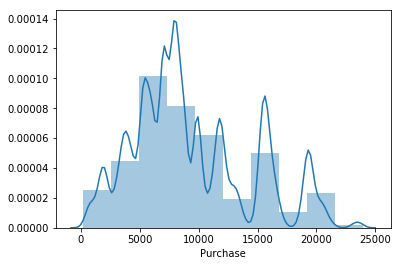

In [17]:
sns.distplot(df.Purchase, bins=10)

There is a definite peak just above 5,000, with other bumps around 15,000 and 20,000, possibly indicating that there are some popular products at these price points. Unfortunately, I did not find information on the currency used in this dataset, but with these purchase amounts, it seems safe to assume that the currency is not in U.S. Dollars. Now let us view bar charts of our categorical variables.

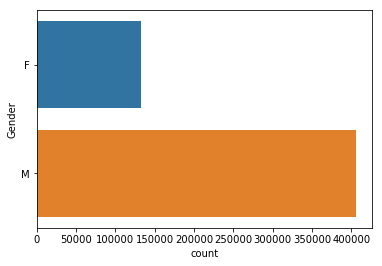

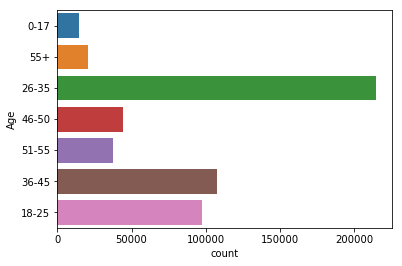

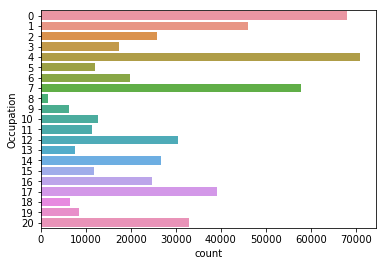

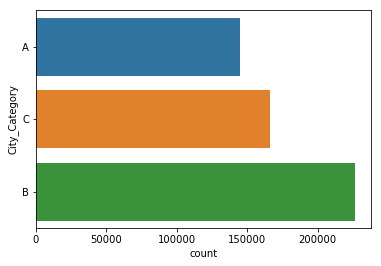

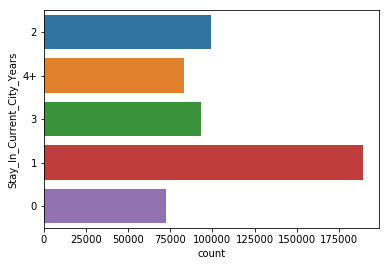

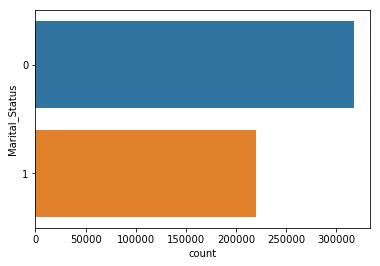

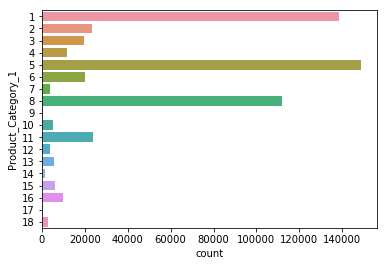

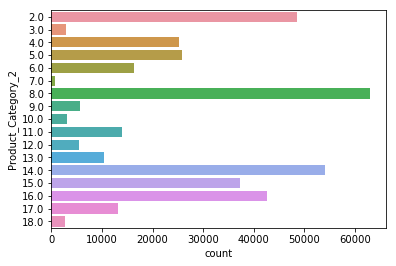

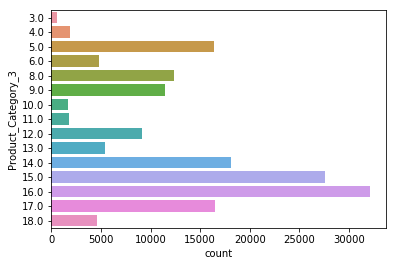

In [18]:
sns.countplot(y=df.Gender, data=df)
plt.show()
sns.countplot(y=df.Age, data=df)
plt.show()
sns.countplot(y=df.Occupation, data=df)
plt.show()
sns.countplot(y=df.City_Category, data=df)
plt.show()
sns.countplot(y=df.Stay_In_Current_City_Years, data=df)
plt.show()
sns.countplot(y=df.Marital_Status, data=df)
plt.show()          
sns.countplot(y=df.Product_Category_1, data=df)
plt.show() 
sns.countplot(y=df.Product_Category_2, data=df)
plt.show()  
sns.countplot(y=df.Product_Category_3, data=df)
plt.show()

There is a lot of important information in our bar charts above.  We can see that in this dataset most of the purchases are made by: 
-	Males
-	People of 18-45 years of age
-	People who have lived in their current city for one year
-	People who are unmarried 

As for our popular product categories, it seems like products in the 1, 2, 5, 8, 14, 15, 16 are most popular, but to better understand the product category information, I want to reorganize the columns a bit in the next section.  

<hr>
<br /> <span id="feature"></span>
## Feature Engineering 
Before we move forward, let us re-code our categorical variables into indicator variables using a binary encoding.  In the code below, I am taking each categorical column and creating a new column for each category, in a example the City_Category column is expanded into three columns: cityA, cityB, and cityC.  Each row now will be coded as a 1 if it belongs in that category or it will be coded as a 0 if it does not belong to that category.  This binary encoding will be helpful in our future analyses since these categories are mutually exclusive and are not consistently ordinal in nature. 
More information about indicator variables can be found [here](http://www.socialresearchmethods.net/kb/dummyvar.php).
I am using the get_dummies() function in pandas, documented [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). 

In [19]:
# Gender column 
genderDummies = pd.get_dummies(df["Gender"])
# Age column 
ageDummies = pd.get_dummies(df["Age"])
# Occupation Column -> Changing column names to improve readability 
occDummies = pd.get_dummies(df["Occupation"])
occDummies.columns = ['Occ0', 'Occ1', 'Occ2', 'Occ3', 'Occ4', 'Occ5', 'Occ6', 'Occ7', 'Occ8', 'Occ9', 'Occ10', 
                      'Occ11', 'Occ12', 'Occ13', 'Occ14', 'Occ15', 'Occ16', 'Occ17', 'Occ18', 'Occ19', 'Occ20']
# City Column -> Changing column names to improve readability 
cityDummies = pd.get_dummies(df["City_Category"])
cityDummies.columns = ['cityA', 'cityB', 'cityC']
# Stay in Current City Column -> -> Changing column names to improve readability 
currCityDummies = pd.get_dummies(df["Stay_In_Current_City_Years"])
currCityDummies.columns = ['0y', '1y', '2y', '3y', '4+y']
# Maritial Status -> Changing column names to improve readability 
maritalDummies = pd.get_dummies(df["Marital_Status"])
maritalDummies.columns = ["Single", "Married"]


Currently, a product can have up to three different product categories ('Product_Category_1', 'Product_Category_2', and 'Product_Category_3'), but let us collapse the product category columns down into one set of Product_Category column. I want to still use the binary encoding, but now the columns will not be mutually exclusive since each product can be in different categories.  

In [20]:
# Product Categories -> Each column contains sligtly different information
# But each product can only be in at most 3 categories
# Contains Categories 1-18
prod1Dummies = pd.get_dummies(df["Product_Category_1"])
# Contains Categories 2-18
prod2Dummies = pd.get_dummies(df["Product_Category_2"])
# Contains Categories 3-6 and 8-18
prod3Dummies = pd.get_dummies(df["Product_Category_3"])
prod3Dummies.dtypes
# Adding the product categories together 
categoryDummies = pd.DataFrame()
categoryDummies['cat1'] = prod1Dummies[1]
categoryDummies['cat2'] = prod1Dummies[2] + prod2Dummies[2]
categoryDummies['cat3'] = prod1Dummies[3] + prod2Dummies[3] + prod3Dummies[3]
categoryDummies['cat4'] = prod1Dummies[4] + prod2Dummies[4] + prod3Dummies[4]
categoryDummies['cat5'] = prod1Dummies[5] + prod2Dummies[5] + prod3Dummies[5]
categoryDummies['cat6'] = prod1Dummies[6] + prod2Dummies[6] + prod3Dummies[6]
categoryDummies['cat7'] = prod1Dummies[7] + prod2Dummies[7]
categoryDummies['cat8'] = prod1Dummies[8] + prod2Dummies[8] + prod3Dummies[8]
categoryDummies['cat9'] = prod1Dummies[9] + prod2Dummies[9] + prod3Dummies[9]
categoryDummies['cat10'] = prod1Dummies[10] + prod2Dummies[10] + prod3Dummies[10]
categoryDummies['cat11'] = prod1Dummies[11] + prod2Dummies[11] + prod3Dummies[11]
categoryDummies['cat12'] = prod1Dummies[12] + prod2Dummies[12] + prod3Dummies[12]
categoryDummies['cat13'] = prod1Dummies[13] + prod2Dummies[13] + prod3Dummies[13]
categoryDummies['cat14'] = prod1Dummies[14] + prod2Dummies[14] + prod3Dummies[14]
categoryDummies['cat15'] = prod1Dummies[15] + prod2Dummies[15] + prod3Dummies[15]
categoryDummies['cat16'] = prod1Dummies[16] + prod2Dummies[16] + prod3Dummies[16]
categoryDummies['cat17'] = prod1Dummies[17] + prod2Dummies[17] + prod3Dummies[17]
categoryDummies['cat18'] = prod1Dummies[18] + prod2Dummies[18] + prod3Dummies[18]

Okay now let us combine all of our new columns into one giant dataframe. 

In [21]:
# Combining the dummy columns, id columns, and purchase amount 
dummyComplete = pd.concat([df["User_ID"],df["Product_ID"], df["Purchase"], genderDummies, ageDummies, 
                           occDummies, cityDummies, currCityDummies, maritalDummies, categoryDummies], axis = 1)
pd.set_option('display.max_columns', None)
dummyComplete.head()

,User_ID,Product_ID,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,Occ0,Occ1,Occ2,Occ3,Occ4,Occ5,Occ6,Occ7,Occ8,Occ9,Occ10,Occ11,Occ12,Occ13,Occ14,Occ15,Occ16,Occ17,Occ18,Occ19,Occ20,cityA,cityB,cityC,0y,1y,2y,3y,4+y,Single,Married,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,1000001,P00069042,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1000001,P00087842,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1000002,P00285442,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now we have a dataframe at the purchase level that has binary variables for the categorical data.  Let us look and see what categories were most popular. 

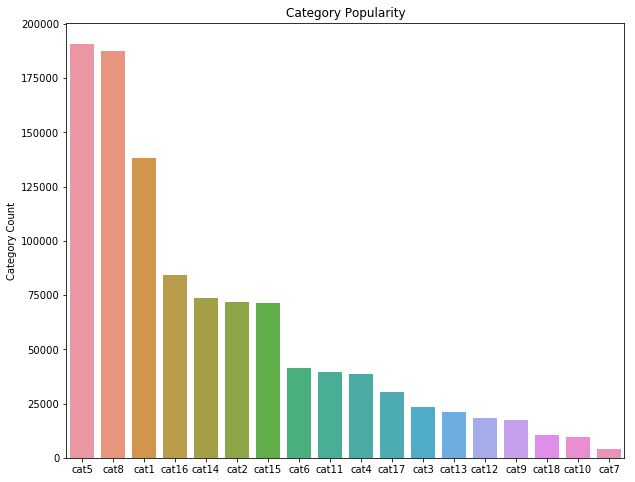

In [23]:
summedCategories = pd.DataFrame(categoryDummies.sum()).sort_values(by=[0], ascending=False)
plt.figure(figsize=(10,8))
prod_cats= sns.barplot(x=summedCategories.index, y=summedCategories[0])
plt.ylabel('Category Count')
plt.title('Category Popularity')
plt.show()

So, products in categories 5, 8, and 1 are the most popular. Before we move our dataframe to the customer level, let us look at correlations.

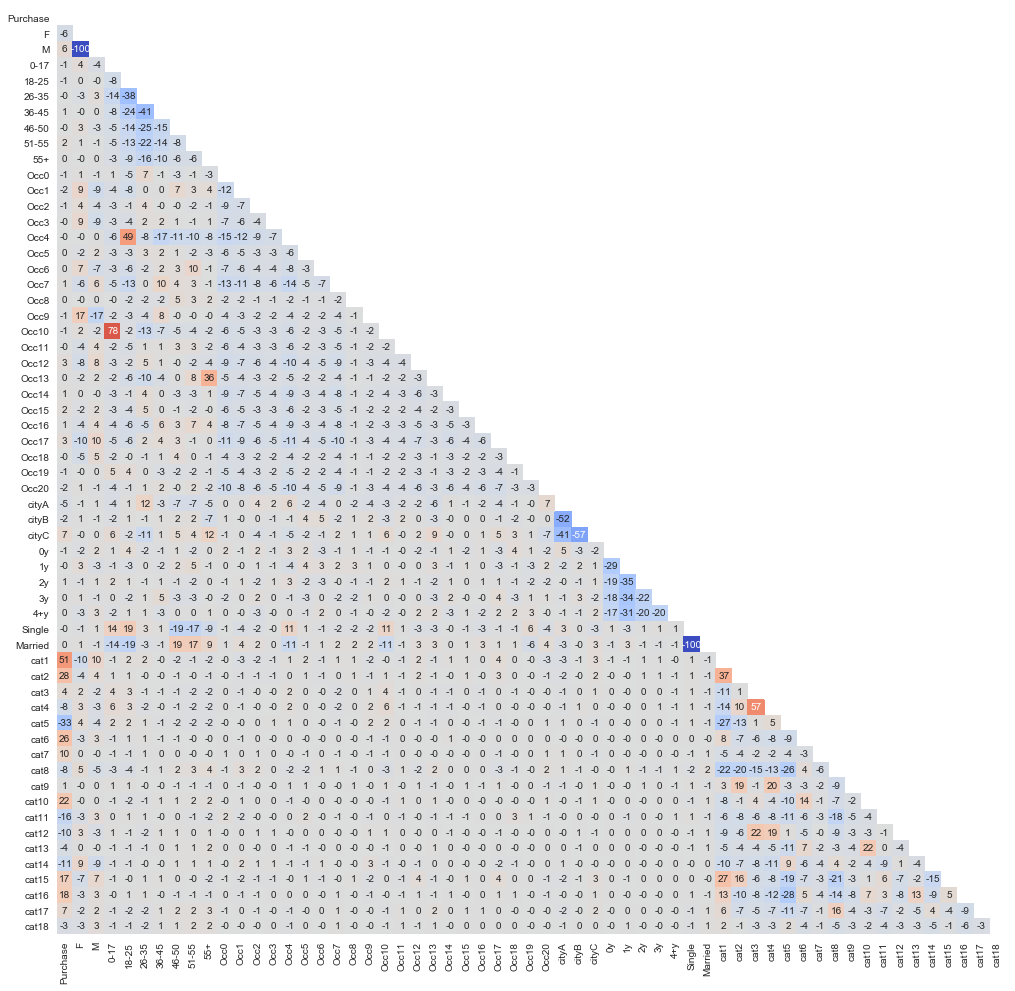

In [24]:
correlations = dummyComplete.corr()
sns.set_style("white")
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17,17))
sns.heatmap(correlations * 100, cmap="coolwarm", annot=True, fmt='.0f', mask=mask, cbar=False)

This is a huge correlation chart, but there is a lot of good information here. First, products in categories 1, 2, 6, 15, 18 are associated with a larger purchase amount, while products in categories 5 and 11 are associated with a smaller purchase amount. Next, there appear to be several products with positive associations with each other, possible complementary goods, and several products with negative associations with each other, possible substitutions.

Also to note, there are no strong relationships between customer characteristics and product category or purchase. 

Among our indicator variables (outside of product category), we do see some multicollinearity since these columns are mutually exclusive. [Multicollinearity can mess with our modeling,](https://en.wikipedia.org/wiki/Multicollinearity) so I will drop one column from each set of columns later on. 

Now let us create a dataframe at the customer level and see if we can learn more about each customer. I will group on the User_ID and aggregate over the purchase amount and product categories.  Since each User_ID represents the same customer, they should all have the same characteristics.  

In [25]:
# Getting the unique User IDs
dummydrop = dummyComplete.drop(["Product_ID", "Purchase", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7", "cat8", "cat9", "cat10", "cat11", "cat12", "cat13", "cat14", "cat15", "cat16", "cat17", "cat18"], axis=1)
cust = pd.DataFrame(dummydrop.drop_duplicates('User_ID'))

# Finding the total purchase amount
totalPur = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['Purchase'].sum())
totalPur.columns = ["User_ID", "Total_Spent"]

# Finding the number of purchases
countPut = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['Purchase'].count())
countPut.columns = ["User_ID", "Count_of_Purchases"]

# Summing the product categories
cat1sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat1'].sum())
cat2sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat2'].sum())
cat3sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat3'].sum())
cat4sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat4'].sum())
cat5sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat5'].sum())
cat6sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat6'].sum())
cat7sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat7'].sum())
cat8sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat8'].sum())
cat9sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat9'].sum())
cat10sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat10'].sum())
cat11sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat11'].sum())
cat12sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat12'].sum())
cat13sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat13'].sum())
cat14sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat14'].sum())
cat15sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat15'].sum())
cat16sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat16'].sum())
cat17sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat17'].sum())
cat18sum = pd.DataFrame(dummyComplete.groupby('User_ID', as_index=False)['cat18'].sum())

# Putting the dataframes together
customer = cust.merge(totalPur, on="User_ID").merge(countPut, on="User_ID").merge(
    cat1sum, on="User_ID").merge(cat2sum, on="User_ID").merge(cat3sum, on="User_ID").merge(
    cat4sum, on="User_ID").merge(cat5sum, on="User_ID").merge(cat6sum, on="User_ID").merge(
    cat7sum, on="User_ID").merge(cat8sum, on="User_ID").merge(cat9sum, on="User_ID").merge(
    cat10sum, on="User_ID").merge(cat11sum, on="User_ID").merge(cat12sum, on="User_ID").merge(
    cat13sum, on="User_ID").merge(cat14sum, on="User_ID").merge(cat15sum, on="User_ID").merge(
    cat16sum, on="User_ID").merge(cat17sum, on="User_ID").merge(cat18sum, on="User_ID")
customer.head()

,User_ID,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,Occ0,Occ1,Occ2,Occ3,Occ4,Occ5,Occ6,Occ7,Occ8,Occ9,Occ10,Occ11,Occ12,Occ13,Occ14,Occ15,Occ16,Occ17,Occ18,Occ19,Occ20,cityA,cityB,cityC,0y,1y,2y,3y,4+y,Single,Married,Total_Spent,Count_of_Purchases,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,1000001,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,333481,34,4,3,11,13,5.0,2,0,13.0,2,0,0,8,0,3,1,2,2,0
1,1000002,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,810353,76,31,9,0,0,15.0,9,0,46.0,1,1,2,0,3,10,7,14,7,1
2,1000003,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,341635,29,15,15,1,1,15.0,0,0,6.0,0,0,2,0,0,3,1,2,0,4
3,1000004,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,205987,13,13,4,0,0,0.0,1,0,2.0,1,0,2,0,0,2,5,3,1,0
4,1000005,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,821001,106,18,5,2,4,26.0,9,5,57.0,0,1,5,2,4,13,6,21,2,0


Now we have dataframes at the purchase level and at the customer level. Let us look at the correlations for the customer dataframe.

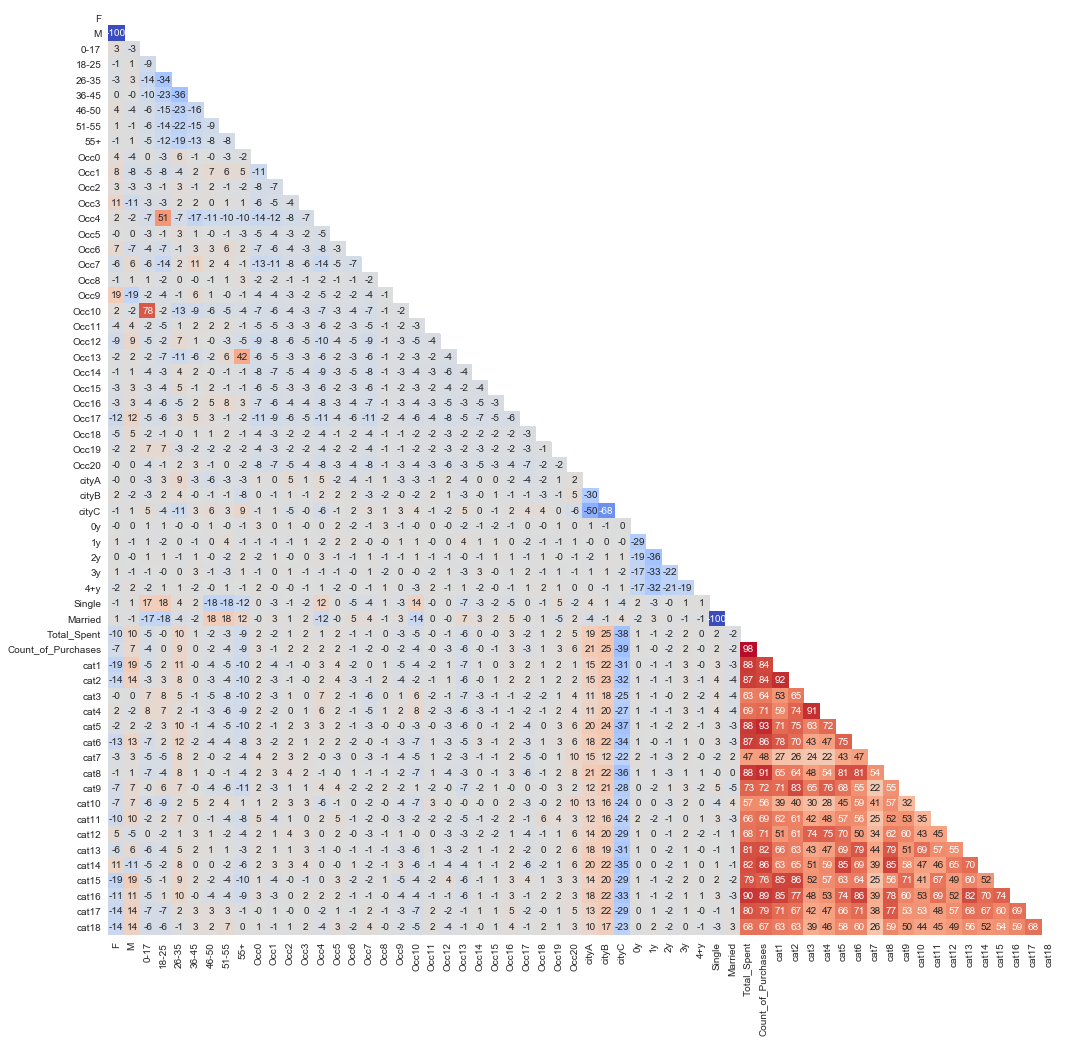

In [26]:
correlations1 = customer.corr()
sns.set_style("white")
mask1 = np.zeros_like(correlations1, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
plt.figure(figsize=(17,17))
sns.heatmap(correlations1 * 100, cmap="coolwarm", annot=True, fmt='.0f', mask=mask1, cbar=False)

 This correlation plot also provides some interesting insights, such as:
- Number of Purchases, Total Spent, and Purchase Category are all highly related. This is understandable since there is a lot of overlap in categories for each purchase, and the more things someone purchased, the higher the amount they spent. 
- In this plot, the relationships between gender and product category are stronger than in the previous correlation plot. 
- The city type is related to purchasing, with those in city types A and B making more purchases, and those in city type C making fewer purchases. 
- There is a relationship between a few of the job types with age and gender, indicating that some jobs are stratified by age and gender.

<hr>
<br /> <span id="cluster"></span>
## Customer Clusters 
Now let us see if our customers naturally fall into clusters.  I'm going to take out Total_Spent and Count_of_Purchases before I cluster to see if these clusters can be useful for predicting either of these values. 

In [27]:
x1 = customer["Total_Spent"]
x2 = customer["Count_of_Purchases"]
y = customer.drop(["User_ID", "Total_Spent", "Count_of_Purchases"], axis=1)

Now let us make our clusters. I will be using K-Means Clustering which is an unsupervised method to find groups in the data.  In K-Means Clustering, a number of clusters, K, is defined by the user, and each point is assigned to a cluster based on its distance to the cluster center, or centroid.  The centroid and point assignment are altered and updated until an optimal point, where the sum of each point’s distance to the centroid is minimized, is found, and each point has a cluster label. More information about the K-Means Clustering algorithm is available [here.]( https://www.datascience.com/blog/k-means-clustering)
After reviewing various numbers of clusters in this data, I have decided on two clusters to best describe the data.

In [28]:
model = KMeans(n_clusters=2)
model = model.fit(scale(y))

Now let us use Total_Spent and Count_of_Purchases to plot our clusters.  

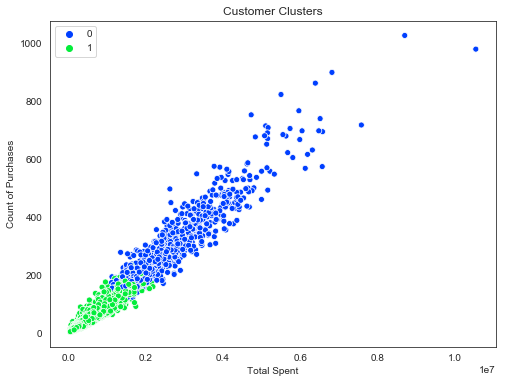

In [29]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-bright')
sns.scatterplot(x=x1, y=x2, hue=model.labels_)
plt.xlabel('Total Spent')
plt.ylabel('Count of Purchases')
plt.title('Customer Clusters')
plt.show()

Given that there is a relationship between Total_Spent and Count_of_Purchases, it makes sense that our clusters fall along a line into two clusters.  It appears that our clusters have fallen into two groups: small spenders and larger spenders.  Let us explore and see if we can find any major differences across these groups.

In [30]:
customer_cluster=customer
customer_cluster['Cluster']= model.labels_
customer_cluster['Cluster'].value_counts()

1    4998
0     893
Name: Cluster, dtype: int64

The first thing we notice is that there are more people in one cluster over the other. Let us now look at the distributions of each cluster on our various characteristics. I am using a mean aggregation in my bar charts below since our two clusters are unequally distributed to ensure our charts are of the same scale. I am starting with Total_Spent and Count_of_Purchases to see which of our clusters are the big spenders. 

In [31]:
customer_cluster_purchase = pd.DataFrame()
customer_cluster_purchase['Cluster'] = customer_cluster['Cluster']
customer_cluster_purchase['Total_Spent'] = x1
customer_cluster_purchase_mean = pd.DataFrame(customer_cluster_purchase.groupby('Cluster', as_index=False).mean())
customer_cluster_purchase_mean

,Cluster,Total_Spent
0,0,2615847
1,1,536558


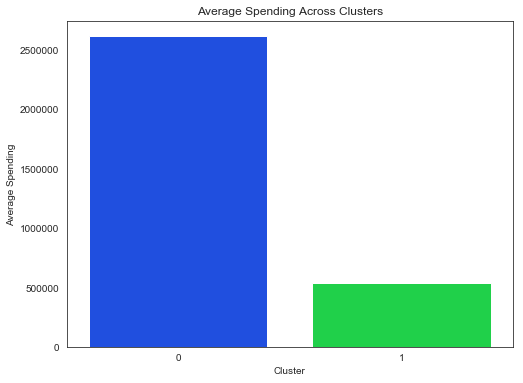

In [32]:
plt.figure(figsize=(8,6))
pchart1= sns.barplot(x='Cluster', y='Total_Spent', data=customer_cluster_purchase_mean)
plt.title('Average Spending Across Clusters')
plt.ylabel('Average Spending')
plt.show()

In [33]:
customer_cluster_purchase_no = pd.DataFrame()
customer_cluster_purchase_no['Cluster'] = customer_cluster['Cluster']
customer_cluster_purchase_no['Count_of_Purchases'] = x2
customer_cluster_purchase_count = pd.DataFrame(customer_cluster_purchase_no.groupby('Cluster', as_index=False).mean())
customer_cluster_purchase_count

,Cluster,Count_of_Purchases
0,0,292.558791
1,1,55.286515


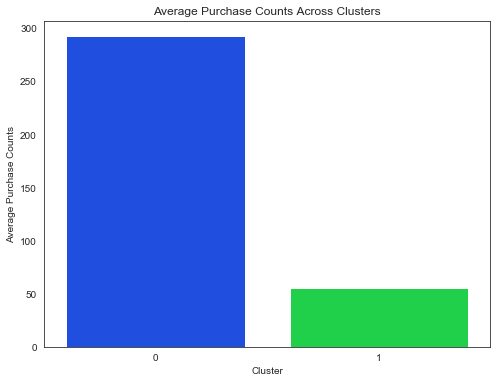

In [34]:
plt.figure(figsize=(8,6))
pchart2= sns.barplot(x='Cluster', y='Count_of_Purchases', data=customer_cluster_purchase_count)
plt.title('Average Purchase Counts Across Clusters')
plt.ylabel('Average Purchase Counts')
plt.show()

So, our smaller cluster is spending the most money and making the most purchases. Now let us look the gender distribution across clusters. 

In [35]:
customer_cluster_gender = customer_cluster.iloc[:,1:3]
customer_cluster_gender['Cluster'] = customer_cluster['Cluster']
customer_cluster_gender_groups= pd.DataFrame(customer_cluster_gender.groupby('Cluster', as_index=False).mean())
customer_cluster_gender_groups

,Cluster,F,M
0,0,0.213886,0.786114
1,1,0.295118,0.704882


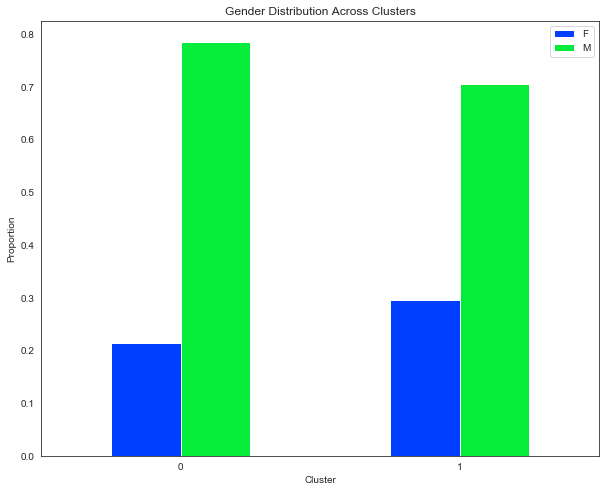

In [36]:
plt.figure(figsize=(8,6))
gender_chart = customer_cluster_gender.groupby('Cluster').mean().plot.bar(rot=0, figsize=(10,8))
plt.title('Gender Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

So our big spender group has slightly more males and slightly fewer females. Let us look at age next.

In [37]:
customer_cluster_age = customer_cluster.iloc[:,3:10]
customer_cluster_age['Cluster'] = customer_cluster['Cluster']
customer_cluster_age_groups= pd.DataFrame(customer_cluster_age.groupby('Cluster', as_index=False).mean())
customer_cluster_age_groups

,Cluster,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,0,0.017917,0.190370,0.443449,0.198208,0.066069,0.064950,0.019037
1,1,0.040416,0.179872,0.331533,0.198079,0.094438,0.084634,0.071028


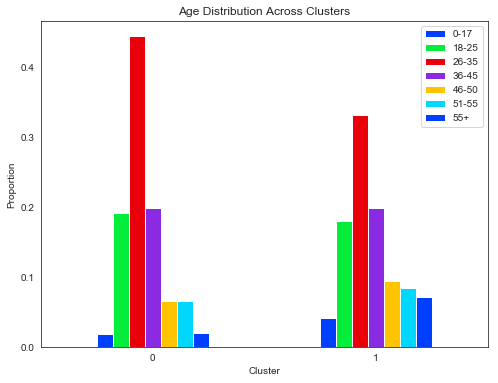

In [38]:
age_chart = customer_cluster_age.groupby('Cluster').mean().plot.bar(rot=0, figsize=(8,6))
plt.title('Age Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

Our big spender group has more people in the 26-35 age group and fewer at the extremes.  Perhaps this group is more likely be parents to younger children with a long holiday wish-list of toys and these parents want to get everything during Black Friday to save money.  Or perhaps they have fewer children and more expendable income for themselves and their friends. But now let us move on to occupation.  

In [39]:
customer_cluster_occ = customer_cluster.iloc[:,10:31]
customer_cluster_occ['Cluster'] = customer_cluster['Cluster']
customer_cluster_occ_groups= pd.DataFrame(customer_cluster_occ.groupby('Cluster', as_index=False).mean())
customer_cluster_occ_groups

,Cluster,Occ0,Occ1,Occ2,Occ3,Occ4,Occ5,Occ6,Occ7,Occ8,Occ9,Occ10,Occ11,Occ12,Occ13,Occ14,Occ15,Occ16,Occ17,Occ18,Occ19,Occ20
0,0,0.139978,0.077268,0.059351,0.034714,0.136618,0.026876,0.038074,0.109742,0.002240,0.010078,0.011198,0.020157,0.049272,0.005599,0.053751,0.023516,0.051512,0.055991,0.007839,0.016797,0.069429
1,1,0.112645,0.089636,0.040616,0.027811,0.123649,0.017407,0.038816,0.114246,0.003001,0.015806,0.036415,0.022009,0.066427,0.027011,0.049220,0.023810,0.037815,0.088235,0.012005,0.011204,0.042217


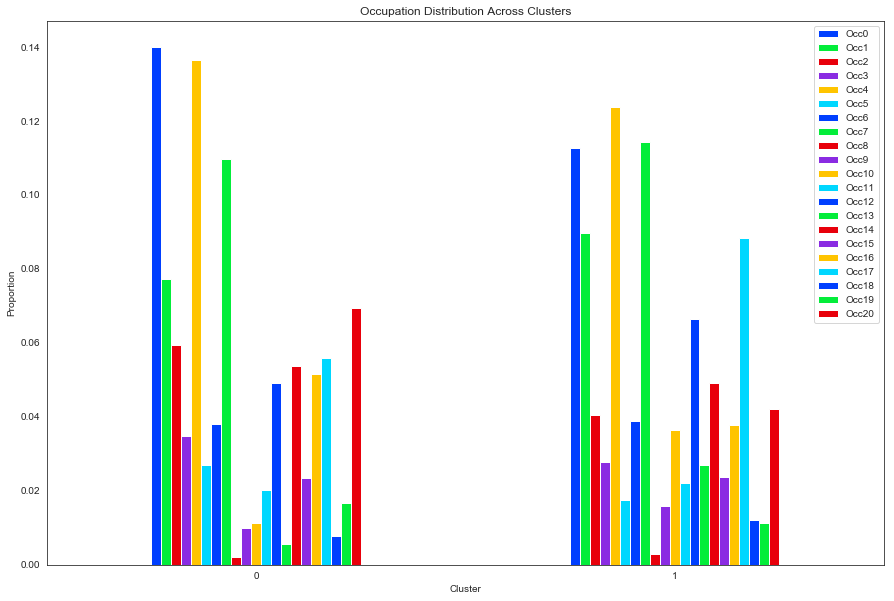

In [40]:
customer_cluster_occ.groupby('Cluster').mean().plot.bar(rot=0, figsize=(15,10))
plt.title('Occupation Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

There are various differences across occupations, indicating that some occupations may have more disposable income than others, but unfortunately this column was masked and we don’t not know what are the actual occupations.  So, let us move along to city type.   

In [41]:
customer_cluster_city = customer_cluster.iloc[:,31:34] 
customer_cluster_city['Cluster'] = customer_cluster['Cluster']
customer_cluster_city_groups= pd.DataFrame(customer_cluster_city.groupby('Cluster', as_index=False).mean())
customer_cluster_city_groups

,Cluster,cityA,cityB,cityC
0,0,0.320269,0.620381,0.059351
1,1,0.151861,0.230692,0.617447


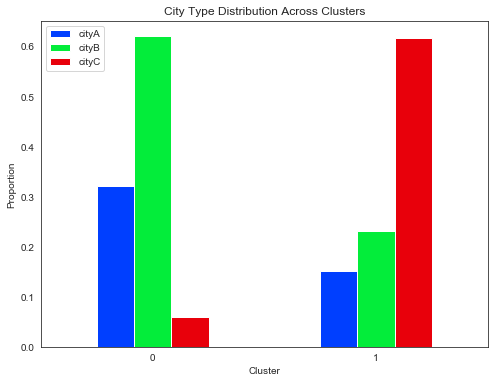

In [42]:
customer_cluster_city.groupby('Cluster').mean().plot.bar(rot=0, figsize=(8,6))
plt.title('City Type Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

There is a clear difference in city types among the clusters. Our smaller spenders are more likely to be in city type C, whereas our big spenders are more likely to be in city type B.  This indicates that city type C may be more rural, making it more difficult to go shopping, whereas city type B may be more urban, with a greater access to malls and shopping centers. Now let us look at how long each customer has been in their current city and their marital status.  

In [43]:
customer_cluster_years = customer_cluster.iloc[:,34:39] 
customer_cluster_years['Cluster'] = customer_cluster['Cluster']
customer_cluster_years_groups= pd.DataFrame(customer_cluster_years.groupby('Cluster', as_index=False).mean())
customer_cluster_years_groups

,Cluster,0y,1y,2y,3y,4+y
0,0,0.136618,0.348264,0.192609,0.183651,0.138858
1,1,0.130052,0.355142,0.194678,0.163065,0.157063


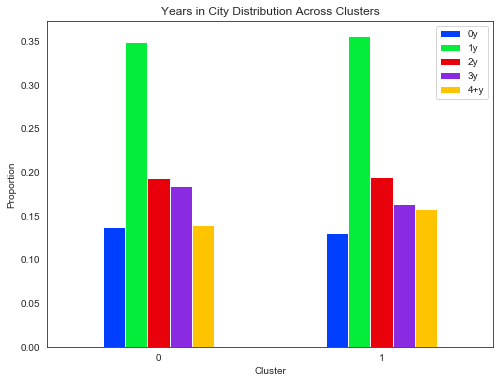

In [44]:
customer_cluster_years.groupby('Cluster').mean().plot.bar(rot=0, figsize=(8,6))
plt.title('Years in City Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

In [45]:
customer_cluster_marital = customer_cluster.iloc[:,39:41] 
customer_cluster_marital['Cluster'] = customer_cluster['Cluster']
customer_cluster_marital_groups= pd.DataFrame(customer_cluster_marital.groupby('Cluster', as_index=False).mean())
customer_cluster_marital_groups

,Cluster,Single,Married
0,0,0.614782,0.385218
1,1,0.573830,0.426170


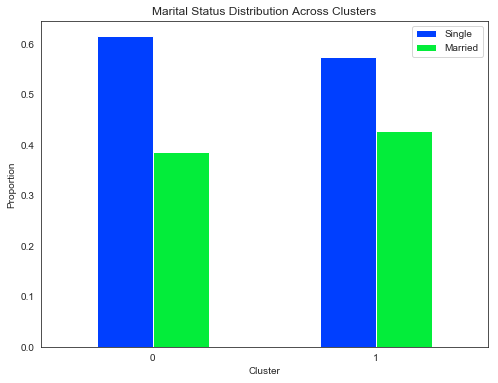

In [46]:
customer_cluster_marital.groupby('Cluster').mean().plot.bar(rot=0, figsize=(8,6))
plt.title('Marital Status Distribution Across Clusters')
plt.ylabel('Proportion')
plt.show()

Years in current city and marital status seem pretty similar across clusters. Now let us move to the product categories. 

In [47]:
customer_cluster_prods = customer_cluster.iloc[:,43:] 
customer_cluster_prods_groups= pd.DataFrame(customer_cluster_prods.groupby('Cluster', as_index=False).mean())
customer_cluster_prods_groups

,Cluster,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,0,73.882419,38.698768,12.471445,22.368421,103.553191,21.983203,2.377380,98.216125,9.357223,4.512878,23.077268,10.604703,11.455767,38.880179,36.938410,45.970885,15.183651,6.118701
1,1,14.480992,7.487395,2.430372,3.732893,19.682473,4.322129,0.432173,19.981393,1.811325,1.138655,3.815526,1.784314,2.193677,7.814926,7.632053,8.682473,3.318727,0.981192


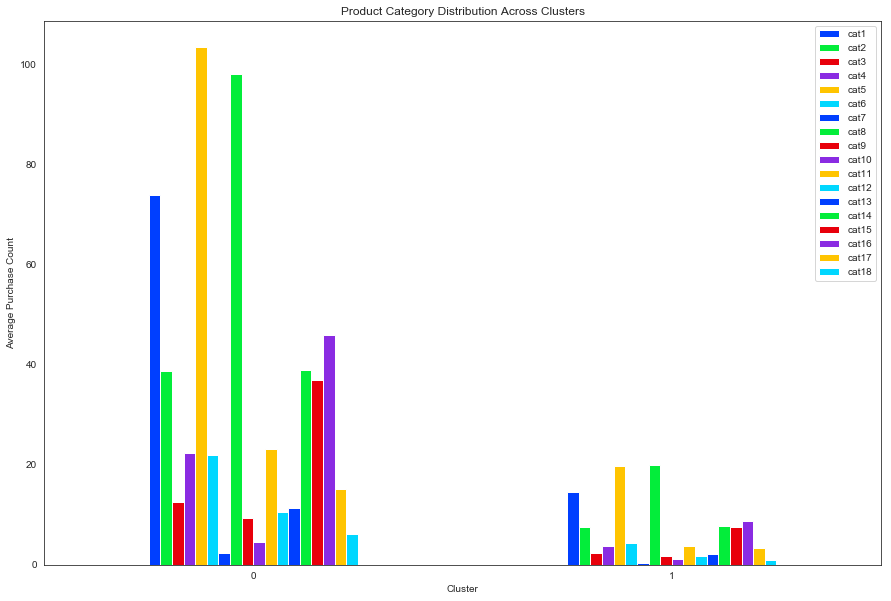

In [48]:
customer_cluster_prods.groupby('Cluster').mean().plot.bar(rot=0, figsize=(15,10))
plt.title('Product Category Distribution Across Clusters')
plt.ylabel('Average Purchase Count')
plt.show()

Again, it is abundantly clear that our big spenders are making more purchases of every product type.

So, our big spenders tend to be 26-35 years of age and in City Type B and our smaller spenders tend to be in City Type C. Let us see what we can find out by modeling.  

<hr>
<br /> <span id="predict"></span>
## Predicting Customer Spending
Now let us try to understand what traits affect customer spending. To accomplish this goal, we will build a predictive model.  I like to build a pipeline of models, because it allows one to easily scale their data, run several different models, tune hyperparameters, and test model performance. But before we begin modeling, we must define our target variable and predictor variables. To turn our indicator variables into dummy variable to prevent multicollinearity, we must drop one column from each category.  This means that our category parameters will be in comparison to the dropped value. We must also drop everything directly related to our target value and our id columns. 

In [49]:
totalSpentY = customer['Total_Spent']
totalSpendX = customer.drop(['Total_Spent', 'User_ID', 'Count_of_Purchases', 'F', '55+', 'Occ20', 'cityC', '4+y', 
                            'Single', 'cat18', 'Cluster'], axis=1)

We must first split our data into train and test data sets to prevent model overfitting.

In [50]:
X_train_spent, X_test_spent, y_train_spent, y_test_spent = train_test_split(totalSpendX, totalSpentY, test_size=0.2, 
                                                                            random_state=1234)

Next, we will create a set of pipelines and hyperparameter dictionaries. Using pipelines lets us easily scale our data, build our models, and fine tune our hyperparameters to find the most predictive model on our test data. In our pipeline is a [Lasso Model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), a [Ridge Model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), an [ElasticNet Model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), a [Random Forest model](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), and a [Graddient Boosting Model](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

In [51]:
# Creating the pipeling of models
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

# Potential Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Potential Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Potential Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

#  Potential Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Potential Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

# Creating the hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

Now we can fit these models to our test data. Please be patient, as this may take some time.

In [52]:
# Create empty dictionary called fitted_models
fitted_models_spent = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model_spent = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model_spent.fit(X_train_spent, y_train_spent)
    
    # Store model in fitted_models[name] 
    fitted_models_spent[name] = model_spent
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

('enet', 'has been fitted.')
('gb', 'has been fitted.')
('ridge', 'has been fitted.')
('rf', 'has been fitted.')
('lasso', 'has been fitted.')


Now let us see how our models perform on the test data.  We will look at the R-Squared value and the Mean Absolute Error. 

In [53]:
# print the performance of each model in fitted_models on the test set.
for name, model_spent in fitted_models_spent.items():
    pred = model_spent.predict(X_test_spent)
    print( name )
    print( 'R^2:', r2_score(y_test_spent, pred ))
    print( 'MAE:', mean_absolute_error(y_test_spent, pred))
    print('--------')

enet
('R^2:', 0.9773919574462443)
('MAE:', 79039.745637356173)
--------
lasso
('R^2:', 0.97734484274282474)
('MAE:', 78984.850576182638)
--------
ridge
('R^2:', 0.97736745644496958)
('MAE:', 79016.485115019314)
--------
gb
('R^2:', 0.96961406999288546)
('MAE:', 95969.130743062124)
--------
rf
('R^2:', 0.97409226408638372)
('MAE:', 84642.514486853266)
--------


It looks like he elastic net, lasso, and ridge models are our most predictive models, with all models performing fairly similarly. Let us move forward with ridge and see what features the ridge model lists as the most important in predicting total spent.  Specifically, let us find the 15 coefficients with the largest estimate absolute value. 

In [54]:
ridge_estimates = pd.DataFrame(fitted_models_spent['ridge'].best_estimator_.steps[1][1].coef_)
ridge_coef = pd.DataFrame(list(X_test_spent))
coefficents_ridge = pd.concat([ridge_coef, ridge_estimates], axis=1)
coefficents_ridge.columns.values[1] = '1'
coefficents_ridge['sort'] = coefficents_ridge[1].abs()
coefficents_ridge = coefficents_ridge.sort_values(by='sort', ascending=False).drop('sort', axis=1)
coefficents_ridge = coefficents_ridge[:15]
coefficents_ridge

,0,1
41,cat8,242233.927059
34,cat1,149168.477103
38,cat5,140291.176808
49,cat16,129781.091426
35,cat2,124513.359318
39,cat6,56404.013141
36,cat3,51161.253142
48,cat15,45172.337005
43,cat10,40953.857827
50,cat17,40323.086171


So, the best estimators are all product categories but remember that since we are using dummy variables and took out category 18, these values are relative to category 18.  But it makes sense that the product characteristics are what affects total spending the most, since each product purchased increases the amount spent. Unfortunately, this doesn’t tell us much about the customer characteristics and spending, so let us explore the relationship between customer characteristics and price more. We will do the same thing as above, reusing our pipelines, but without any product categories in the model. 

In [55]:
totalSpentY1 = customer['Total_Spent']
totalSpendX1 = customer.drop(['Total_Spent', 'User_ID', 'Count_of_Purchases', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                             'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
                             'cat16', 'cat17', 'cat18', 'F', '55+', 'Occ20', 'cityC', '4+y', 
                            'Single',  'Cluster'], axis=1)
X_train_spent1, X_test_spent1, y_train_spent1, y_test_spent1 = train_test_split(totalSpendX1, totalSpentY1, test_size=0.2, 
                                                                            random_state=1234)

In [56]:
# Create empty dictionary called fitted_models
fitted_models_spent1 = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model_spent1 = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model_spent1.fit(X_train_spent1, y_train_spent1)
    
    # Store model in fitted_models[name] 
    fitted_models_spent1[name] = model_spent1
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

('enet', 'has been fitted.')
('gb', 'has been fitted.')
('ridge', 'has been fitted.')
('rf', 'has been fitted.')
('lasso', 'has been fitted.')


In [57]:
# print the performance of each model in fitted_models on the test set.
for name, model_spent in fitted_models_spent1.items():
    pred = model_spent1.predict(X_test_spent1)
    print( name )
    print( 'R^2:', r2_score(y_test_spent1, pred ))
    print( 'MAE:', mean_absolute_error(y_test_spent1, pred))
    print('--------')

enet
('R^2:', 0.1687615339024644)
('MAE:', 605585.28438626055)
--------
lasso
('R^2:', 0.1687615339024644)
('MAE:', 605585.28438626055)
--------
ridge
('R^2:', 0.1687615339024644)
('MAE:', 605585.28438626055)
--------
gb
('R^2:', 0.1687615339024644)
('MAE:', 605585.28438626055)
--------
rf
('R^2:', 0.1687615339024644)
('MAE:', 605585.28438626055)
--------


As expected, there was a lot less predictive power, but let us see what predictors are important outside of product categories.

In [58]:
enet_estimates = pd.DataFrame(fitted_models_spent1['ridge'].best_estimator_.steps[1][1].coef_)
enet_coef = pd.DataFrame(list(X_test_spent1))
coefficents_enet = pd.concat([enet_coef, enet_estimates], axis=1)
coefficents_enet.columns.values[1] = '1'
coefficents_enet['sort'] = coefficents_enet[1].abs()
coefficents_enet = coefficents_enet.sort_values(by='sort', ascending=False).drop('sort', axis=1)
coefficents_enet = coefficents_enet[:15]
coefficents_enet

,0,1
28,cityB,300580.222277
27,cityA,271145.336861
3,26-35,125354.177377
0,M,110349.537843
4,36-45,86108.067751
2,18-25,58525.250278
5,46-50,52828.893241
19,Occ12,-50056.071310
24,Occ17,-39807.218294
6,51-55,34073.275952


So, this information replicates some of the findings we found in our clustering: 
- City Type B is associated with more spending, whereas City Type C is associated with less spending.
- People ages 26-35 are associated with more spending. 
- Males are associated with more spending. 
- There exists some associations between occupation and spending.

<hr>
<span id="conclude"></span>
## Conclusion

Today, we explored a dataset of Black Friday purchase information.  Unsurprisingly, we found that product category has a large influence on the total amount of money spent on Black Friday, since each product purchased directly increases the customer’s total purchase cost.  As for customer characteristics, age, where they live, and occupation, influence how much money they spend on Black Friday.  This is likely due to having more disposable income, having easier access to shopping centers and malls, and having a large holiday shopping list. 

Thanks for following along and message me on [LinkedIn.](https://www.linkedin.com/in/sophia-rowland/) with any questions or comments!